In [10]:
# import basic libraries
import glob, os
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn')
from obspy import read, Stream

In [11]:
from pathlib import Path

mseed_files=[]

# get the list of all miniseed recordings (parent folder is the one with catalogs per station)
for path in Path('./').rglob('*Z.miniseed'):
    #print(path.name)
    #mseed_files.append(path.name)
    mseed_files.append(str(path))

In [12]:
# create the list of stations, where each eleent of list is single recording for all stations

fullstringlst = mseed_files
time_aligned_files_all=[]
for s1 in fullstringlst:
    time_aligned_files = []
    for s2 in fullstringlst:
        if s1[31:] == s2[31:]:
            time_aligned_files.append(s2)
    time_aligned_files_all.append(time_aligned_files)      
    #print(time_aligned_files)
    
mseed_data=time_aligned_files_all    

In [14]:
# iterate over the above list, preprocess, generate plot and save the resulting figure

from obspy import read

for ind,file in enumerate(mseed_data[47:48]):
    
    #print(file)
    #print(ind)
    
    streams = [read(file2) for file2 in file] # Where file_list is a list of paths to files on disk that you have already defined
    st = streams[0]
    for stream in streams[1:]:
        st += stream
        
    Nseg   = len(st)	# number of segments in the original window
    Npts   = 900001	# number of points in the segments
    
    data  = np.zeros(shape=(Nseg,Npts),dtype=np.float32)# initialize
    
    
    # Simple preprocessing sequence just for the visualization purposes
    st.detrend(type="constant")
    st.filter("bandpass",freqmin=10,freqmax=90,zerophase=True)
    st.interpolate(sampling_rate=250,window='lanczos') 
    st.merge()
    
    for ii,trace in enumerate(st):

        data[ii,:] = trace.data

        
        
    fig,ax = plt.subplots(figsize=(18,15))

    y = np.linspace(0,data.shape[1],data.shape[1])
    offsets = np.linspace(0,data.shape[0],data.shape[0])
    times = y
    ind=0
    for offset, time in zip(offsets,times):
        #x = 10*ind+data[ind,:]
        x = offset*1+data[ind,:]    
        ind=ind+1
        ax.plot(x,y,'k-')
        #ax.fill_betweenx(y,offset,x,where=(x>offset),color='k')

    ax.set_xlim(0,data.shape[0])
    ax.set_ylim(0,data.shape[1])
    #plt.show()
    plt.tight_layout()
    plt.savefig('mseed_figures/'+file[0][31:54]+'.png', bbox_inches='tight', dpi=300)        
    plt.close('all')    
    #st.write('mseed_resampled/'+mseed_data[datarange[ind]][0][31:56] +'_resampled'+'.miniseed', format="MSEED") 
    
    
#stZ = read('mseed_resampled/'+mseed_data[datarange[ind]][0][31:56] +'_resampled'+'.miniseed')

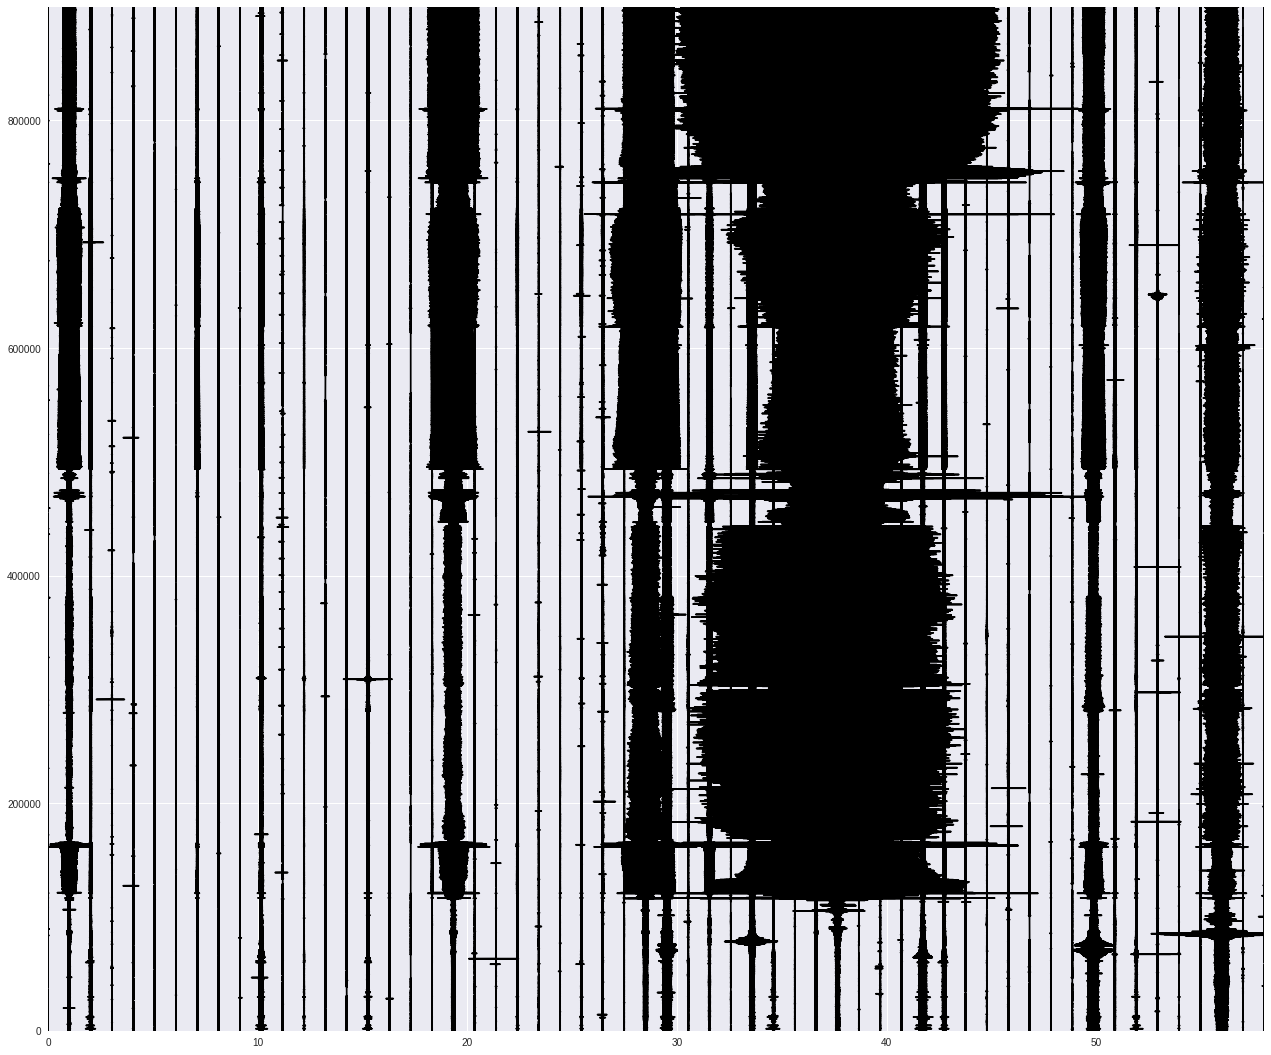

In [ ]:
# exemplary figure just seeing what do we actually save as png

fig,ax = plt.subplots(figsize=(18,15))

y = np.linspace(0,data.shape[1],data.shape[1])
offsets = np.linspace(0,data.shape[0],data.shape[0])
times = y
ind=0
for offset, time in zip(offsets,times):
    #x = 10*ind+data[ind,:]
    x = offset*1+data[ind,:]    
    ind=ind+1
    ax.plot(x,y,'k-')
    #ax.fill_betweenx(y,offset,x,where=(x>offset),color='k')
    
ax.set_xlim(0,dataS.shape[0])
ax.set_ylim(0,dataS.shape[1])
#plt.show()
plt.tight_layout()
#plt.savefig('spectrogram_plot4.png', bbox_inches='tight', dpi=300)

plt.savefig('mseed_figures/'+file[0][31:54]+'.png', bbox_inches='tight', dpi=300)        


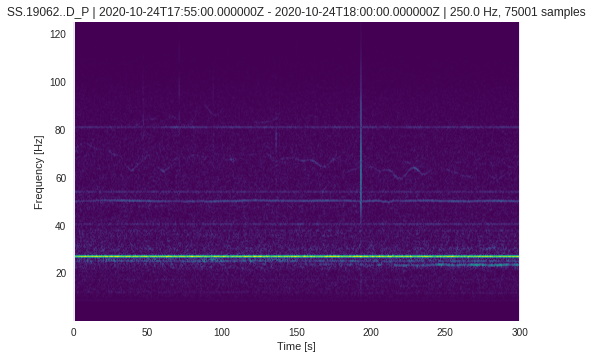

In [632]:
# nice to look at freqeuencies for single stations if needed 
trace.spectrogram()